# Приоритизация гипотез, проведение A/B-тест и анализ результатов для крупного интернет-магазина. 

Цель проекта - провести приоритизацию гипотез, запустить A/B тест и на основе его результатов сделать выводы. Для этого необходимо выполнить задачи:

- применить фреймворк ICE и RICe для приоритизации гипотез. 
- провести анализ результатов A/B теста.
- на основе полученных результатов сделать выводы.

Ход работы

Необходимые данные представлены в 3 датасетах: В файле /datasets/hypothesis.csv представлены гипотезы по увеличению выручки интернет-магазина, файлах /datasets/orders.csv и /datasets/visitors.csv содержатся результаты проведенного A/B теста. О данных в файлах информация не представлена, поэтому необходимо провести их обзор.

Таким образом, проект пройдет в 3 этапа:

- загрузить и проверить данные;
- применить фреймворк ICE и RICe для приоритизации гипотез. 
- проанализировать результаты A/B теста.

### Загрузим данные и просмотрим их

In [8]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [9]:
hypot = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv', parse_dates=['date'])
visitors = pd.read_csv('visitors.csv', parse_dates=['date'])

In [10]:
# Создадим функцию для просмотра информации о датафреймах
def info_dt(row):
    """
    Данная функция выводит первичную информацию о датафреме
    """
    print('\033[1m' + 'Вывод первых строчек:' + '\033[0m')
    
    display(row.head(20))
    print("\n") 
    print('\033[1m' + 'Вывод информации о датафрейме:' + '\033[0m')
    print("\n") 
    row.info()
    print("\n") 
    print('\033[1m' + 'Наличие неявных дубликатов:' + '\033[0m')
    if row.duplicated().sum() > 0:
        print('Дубликатов: ', row.duplicated().sum())
    else:
        print('Дубликаты отсутствуют')

In [11]:
info_dt(hypot)

Вывод первых строчек:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5




Вывод информации о датафрейме:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


Наличие неявных дубликатов:
Дубликаты отсутствуют


**Вывод по датафрейму:** 
- типы данных определены правильно;
- необходимо привести заголовки к нижниму регистру;
- отсутствуют пропуски;
- нет дубликатов.

In [13]:
hypot.columns= hypot.columns.str.lower()
hypot.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [14]:
info_dt(orders)

Вывод первых строчек:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B




Вывод информации о датафрейме:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Наличие неявных дубликатов:
Дубликаты отсутствуют


**Вывод по датафрейму:**
- типы данных определены правильно;
- не верный стиль заголовков;
- отсутствуют пропуски;
- нет дубликатов.

In [16]:
orders.columns = orders.columns.str.replace('Id', '_id') 

In [17]:
info_dt(visitors)

Вывод первых строчек:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406




Вывод информации о датафрейме:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Наличие неявных дубликатов:
Дубликаты отсутствуют


Вывод по датафрейму:

- типы данных определены правильно;
- верный стиль заголовков;
- отсутствуют пропуски;
- нет дубликатов.

### Приоритизация гипотез

#### Применим фреймворк ICE для приоритизации гипотез. 

In [23]:
pd.options.display.max_colwidth = 400
hypot['ICE'] = (hypot['confidence']*hypot['impact']/hypot['efforts'])
hypot.sort_values('ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Приоритетная 8 гипотеза.

#### Применим фреймворк RICE для приоритизации гипотез. 

In [28]:
hypot['RICE'] = (hypot['confidence']*hypot['impact']*hypot['reach']/hypot['efforts'])
hypot.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


In [29]:
hypot['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

При расчете приоретизации методом RICE 7 гипотеза является первостепенной.

**Вывод:**

Приоретезация гиротиз при методах ICE и RICE разная. При использовании метода ICE первая гипотеза 8, А при методе RICE - гипотеза 7. Это связано с тем, что параметр Reach (охват пользовтелей) у гипотезы 8 равен 1. Из этого следует, что пользоветель сможет совершить такую покупку раз в год, а не постоянно возврашаться за новыми покупками. Гипотеза 7 имеет больший параметр охвата. При введении подписки на основные страницы можно чаще оповещать пользователей об акциях в магазине, они чаще будут переходить на страницу с товаром.

### Анализ A/B-теста

In [35]:
orders_group_a = pd.Series(orders[orders['group']=='A']['visitor_id'].unique())
orders_group_b = pd.Series(orders[orders['group']=='B']['visitor_id'].unique())
an_users = pd.Series(orders_group_a.isin(orders_group_b))
print(f'Число повторяющизся пользователей: {an_users.sum()}')
print(f'Доля повторяющизся пользователей: {an_users.sum()/orders["visitor_id"].count()*100}')

Число повторяющизся пользователей: 58
Доля повторяющизся пользователей: 4.845446950710109


Удалим пользователей, которые встречаются в обеих группах.

In [37]:
user_groups_count = orders.groupby('visitor_id')['group'].nunique()
orders = orders[orders['visitor_id'].isin(user_groups_count[user_groups_count == 1].index)]

In [38]:
user_groups_count[user_groups_count > 1].count()

58

#### Построим график кумулятивной выручки по группам. 

In [41]:
orders.head(10)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B
10,3649131742,879864040,2019-08-15,4008,A


In [43]:
date_groups = orders[['date', 'group']].drop_duplicates()

In [44]:
orders_aggregated = date_groups.apply(lambda x: orders[np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,).sort_values(by=['date', 'group'])

visitors_aggregated = date_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,).sort_values(by=['date', 'group'])

cumulative_data = orders_aggregated.merge(
    visitors_aggregated,on=['date', 'group']
)
cumulative_data .columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulative_data.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
5,2019-08-03,B,54,53,288850,1803
6,2019-08-04,A,77,71,388030,2562
7,2019-08-04,B,68,66,385740,2573
8,2019-08-05,A,99,92,474413,3318
9,2019-08-05,B,89,87,475648,3280


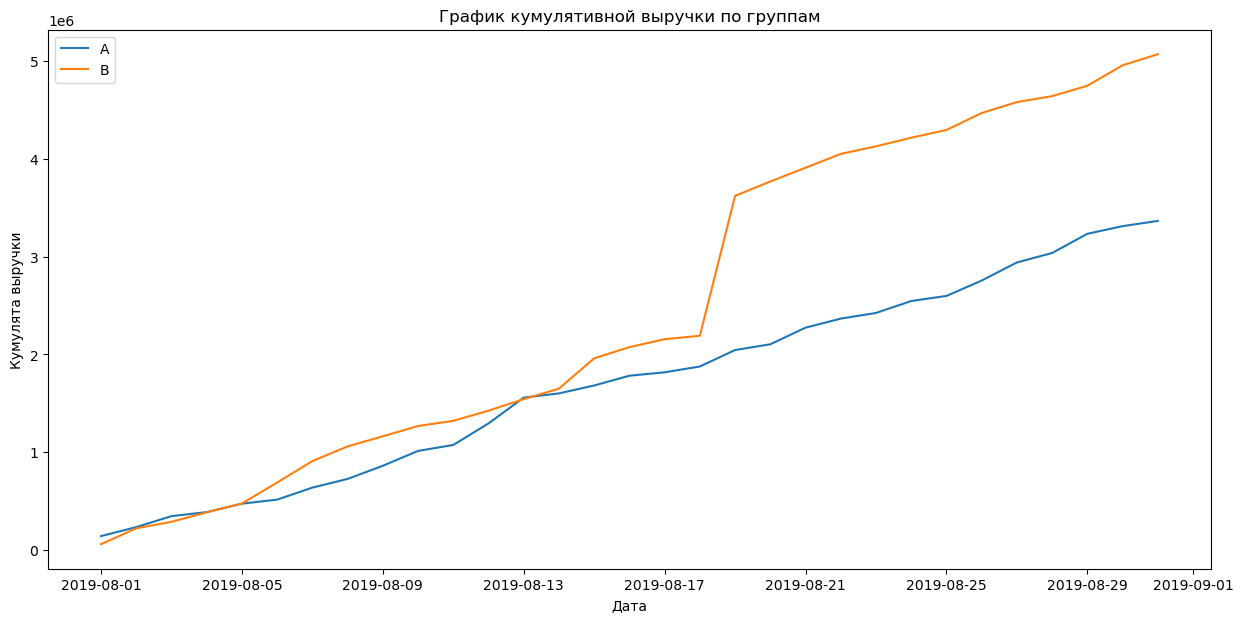

In [45]:
plt.figure(figsize=(15, 7))

cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')

plt.xlabel('Дата')

plt.ylabel('Кумулята выручки')

plt.legend()
plt.show()

**Вывод:**
- выручка группы B больше на рассматриваемом периоде. Только в начеле она была примерно равной;
- произошел резкий скачек выручкуи у группы B 2019-08-19. Это, скорее всего, связано с попаданием аномально большого заказа в выборку. 

#### Построим график кумулятивного среднего чека по группам. 

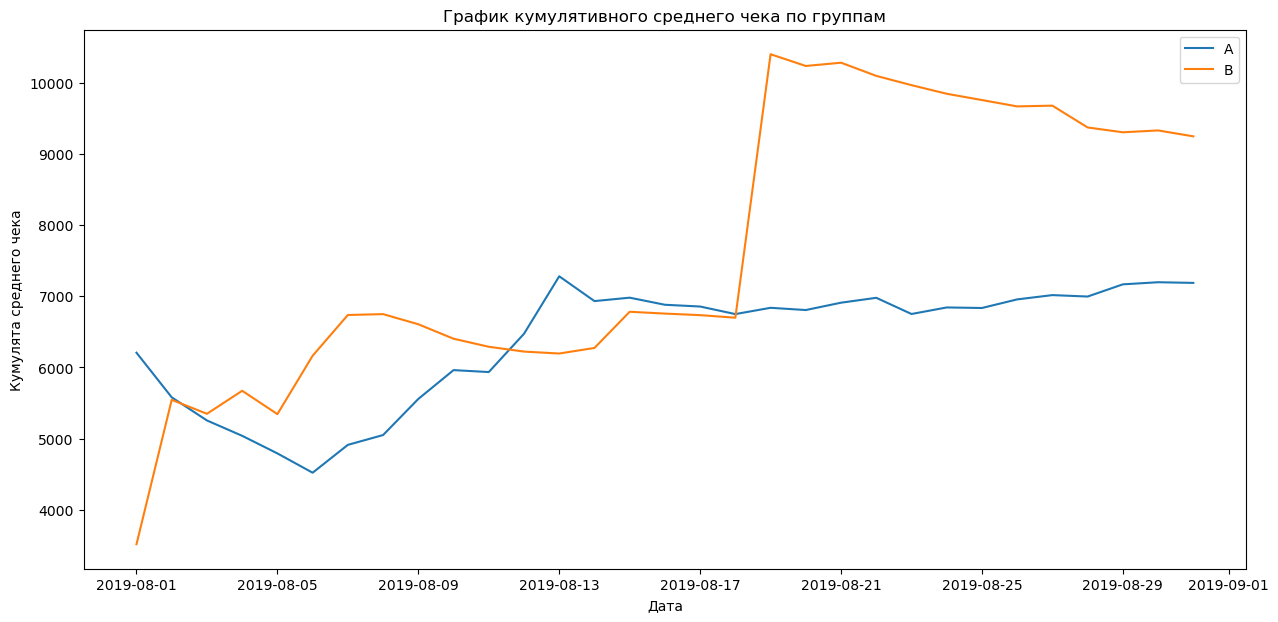

In [49]:
plt.figure(figsize=(15, 7))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')

plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')

plt.xlabel('Дата')

plt.ylabel('Кумулята среднего чека')

plt.legend()
plt.show()

**Вывод:**
- средний чек группы B выше практически на всем рассматриваемом периоде. Заметен тот же скачек, что и на предыдущем графике. Также появился резкий рост группы B в 2019-08-17.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

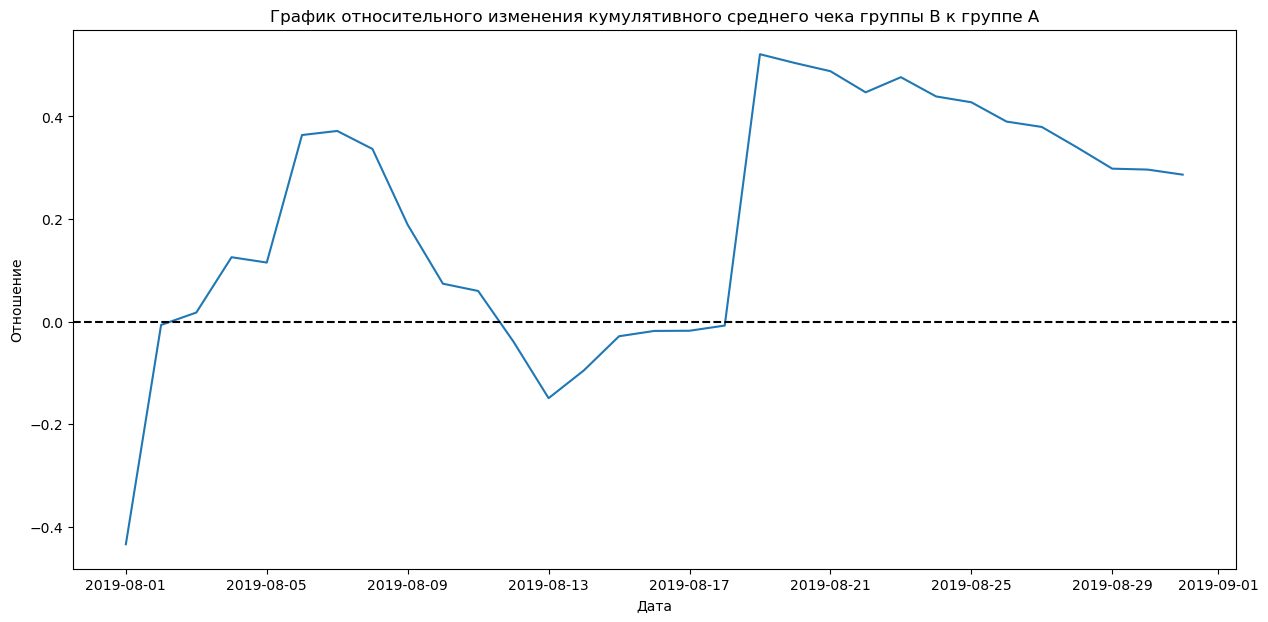

In [53]:
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', 
                                                     suffixes=['_a', '_b'])

plt.figure(figsize=(15,7))
plt.plot(
    merged_cumulative_revenue['date'],
    (merged_cumulative_revenue['revenue_b']/
     merged_cumulative_revenue['orders_b'])/
    (merged_cumulative_revenue['revenue_a']/
    merged_cumulative_revenue['orders_a'])
    -1
)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

plt.xlabel('Дата')

plt.ylabel('Отношение')

plt.axhline(y=0, color='black', linestyle='--')
plt.show()

**Вывод:**
Данный график повторяет тенденции предыдущих графиков. Средний чек группы B практически всегда выше, но наблиюдаются скачки графика. Происходит влияния аномальных занчений.

#### Построим график кумулятивного среднего количества заказов на посетителя по группам

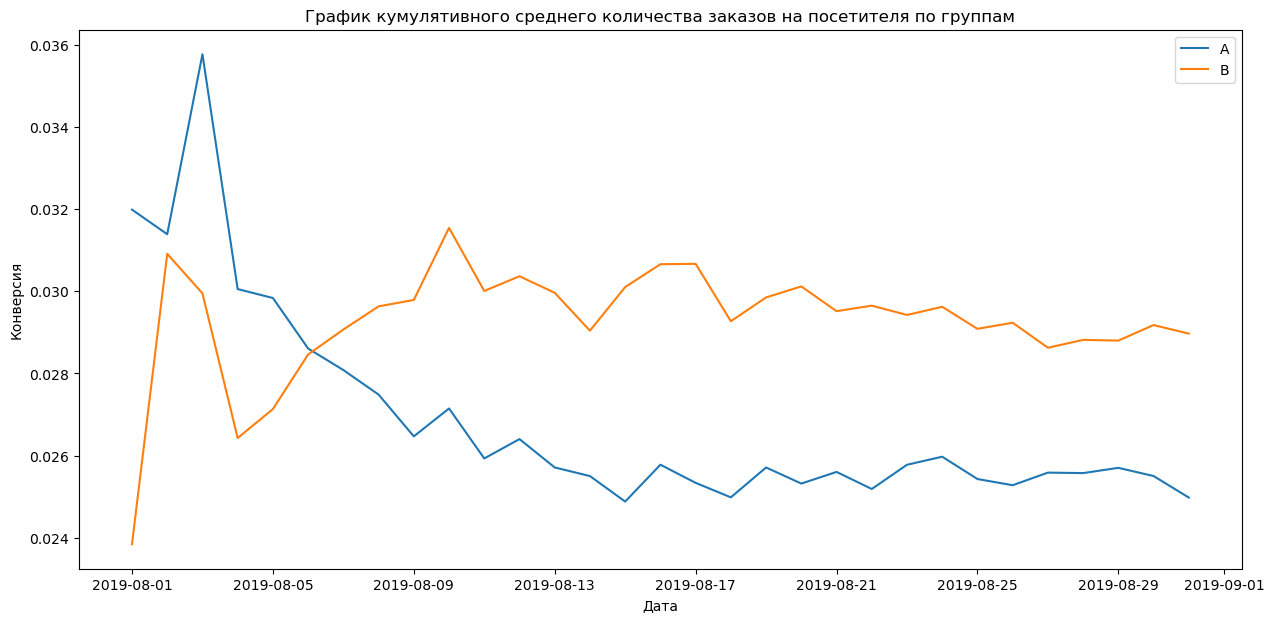

In [57]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

cumulative_data_a = cumulative_data[cumulative_data['group']=='A']


cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(15,7))

plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')

plt.xlabel('Дата')

plt.ylabel('Конверсия')
plt.show()

**Вывод:**
Количество заказов группы A с начала была больше группы B, но спустя небольшой промежуток времени упала с 0.37 до 0.3. У группы B наоборот наблюдается рост количства заказов.

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

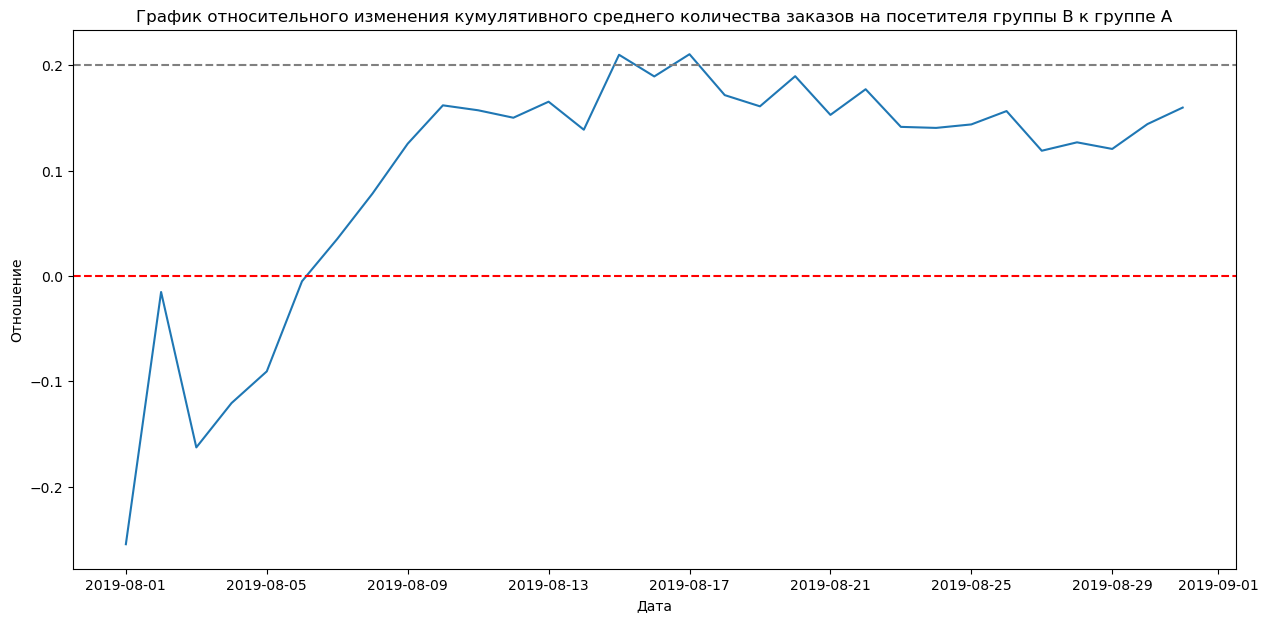

In [61]:
merge_cumulative_conversion = cumulative_data_a[['date', 'conversion']].merge(cumulative_data_b[['date', 'conversion']], 
                                                                             left_on='date', right_on='date', how='left', 
                                                                              suffixes=['_a', '_b'])

plt.figure(figsize=(15, 7))

plt.plot(merge_cumulative_conversion['date'], 
         (merge_cumulative_conversion['conversion_b']/merge_cumulative_conversion['conversion_a'])-1)

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.ylabel('Отношение')

plt.xlabel('Дата')


plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.show()

**Вывод:**
Первые дни теста конверсия была не стабильна. Примерно с середины показатель начал нормализовываться и находится в промежутке от 0.1 до 0.18. Группа B выглядит лучше.

#### Построим точечный график количества заказов по пользователям

In [65]:
orders_count = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_count.columns = ['user_id', 'orders']

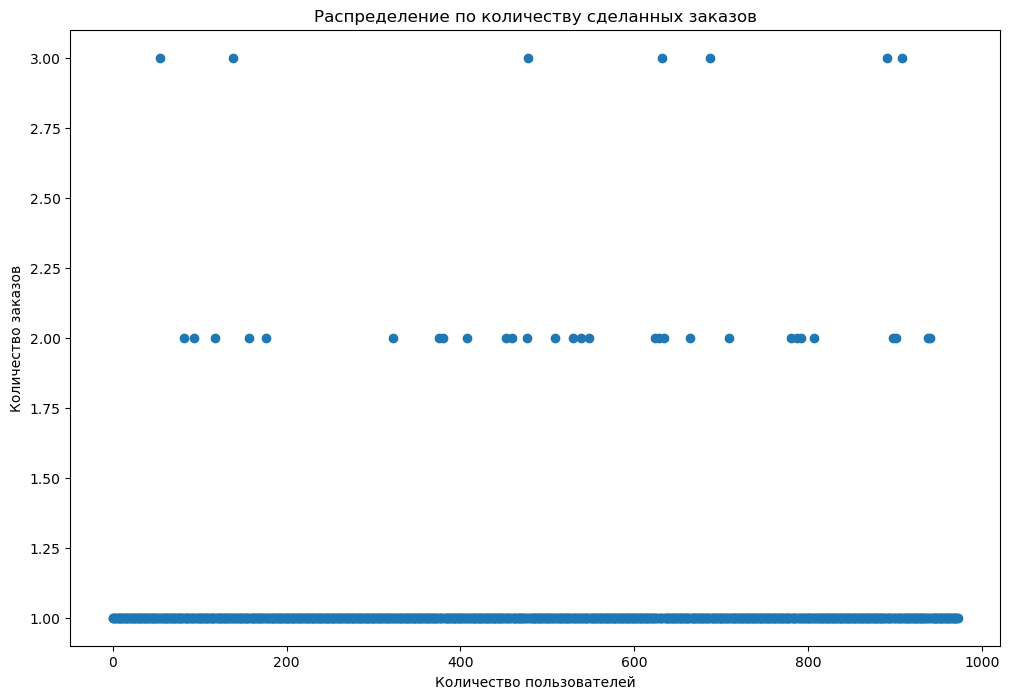

In [66]:
x_values = pd.Series(range(0, len(orders_count)))
 
plt.figure(figsize=(12,8)) 

plt.scatter(x_values, orders_count['orders'])  

plt.ylabel('Количество заказов') 
plt.xlabel('Количество пользователей') 
plt.title('Распределение по количеству сделанных заказов') 
plt.show() 

**Вывод:**
больше всего пользователей, которые сделали 1 заказ, реже те, кто сделал 2. Клиенты, которые сделали заказ больше 2-х раз встречаются редко. 

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [69]:
print(np.percentile(orders_count['orders'], [95, 99])) 

[1. 2.]


**Вывод:**
- Не более 5% пользователей совершили больше 1 заказов;
- не более 1% пользователей совершили больше 2 заказов.
Устанавливаем границу по колличеству заказов на пользователя в 2 шт. 

#### Построим точечный график стоимостей заказов

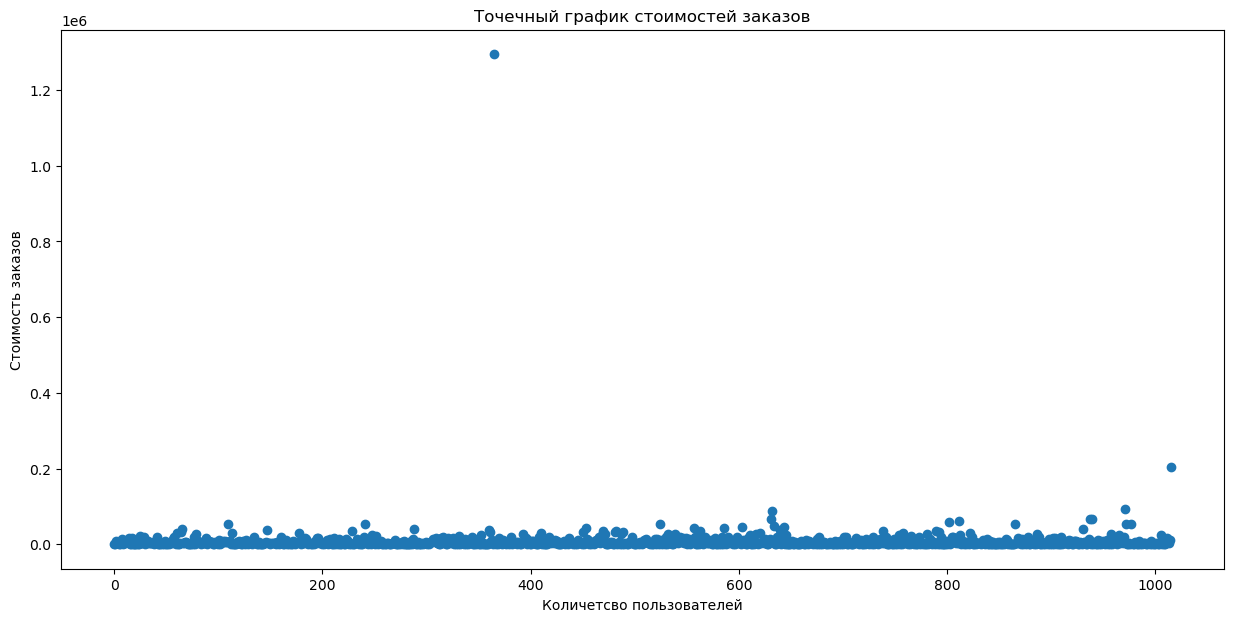

In [73]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(15, 7))
plt.scatter(x_values, orders['revenue'])
                     
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количетсво пользователей')
plt.ylabel('Стоимость заказов')
plt.show()

На графике заметно, что присутствуют заказы стоимостью 1.2 млн и 200000. Данные заказы сильно отличаются по стоимости от других и влияют на результат. Можно ограничить в размерах график и посмотреть на распределение подробнее.

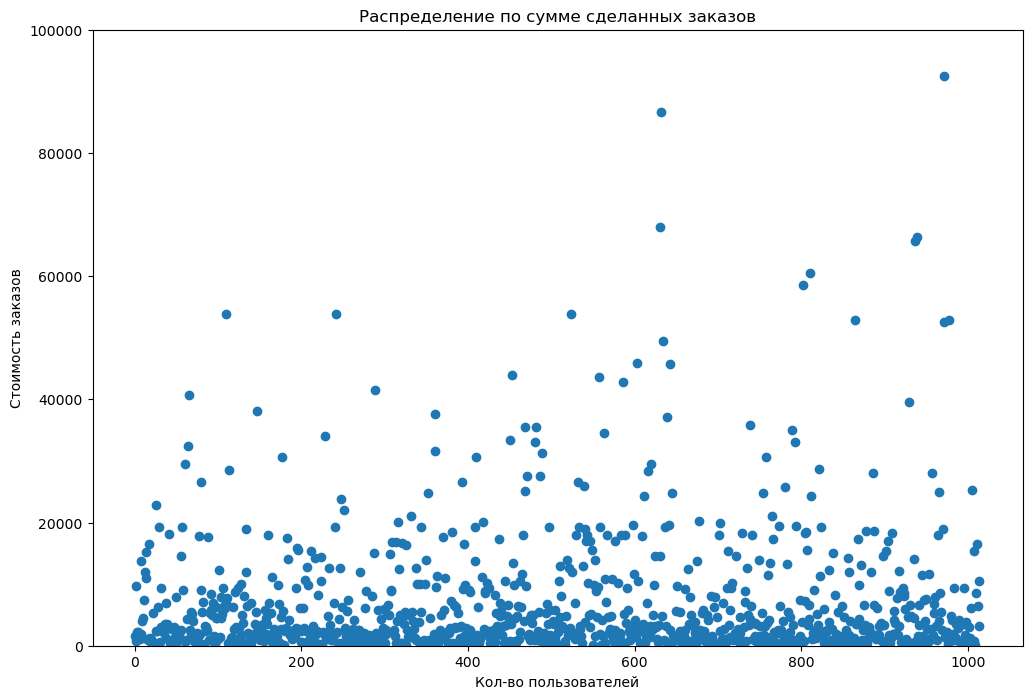

In [75]:
x_values = pd.Series(range(0, len(orders['revenue'])))
 
plt.figure(figsize=(12,8))

plt.scatter(x_values, orders['revenue'])

plt.ylim(0, 100000) 

plt.ylabel('Стоимость заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по сумме сделанных заказов') 
plt.show()  

На данном графике видно, что большая часть стоимости заказов менее 20000. Заказы большей стоимостью встречаются реже.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. 

In [78]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


**Вывод:**
- 95% заказов имеют стоимость не более 26785;
- 99 % заказов имеют стоимость не более 53904

Установим границу по сумме заказа в 26785 

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

In [82]:
orders_by_users_a = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
orders_by_users_a.columns=['user_id','orders']

orders_by_users_b = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
orders_by_users_b.columns=['user_id','orders'] 

In [83]:
sample_a = pd.concat(
    [orders_by_users_a['orders'],
        pd.Series(0, index=np.arange
                  (visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])),
                  name='orders'
                 )],axis=0)
sample_b = pd.concat(
    [orders_by_users_b['orders'],
     pd.Series(0,index=np.arange(
             visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])),
         name='orders')],
    axis=0)

Сформируем нулевую и альетрнативную гипотезы:

H0: Различий в количестве заказов между группами нет

H1: Различия в количестве заказов между группами есть

In [86]:
result_1 = stats.mannwhitneyu(sample_a, sample_b)[1] 

alpha = 0.05

print(f'Значение p-value : {result_1}')

if result_1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")   
print('Отношение конверсии В к А: {0:.3f}'.format(sample_b.mean()/sample_a.mean()-1)) 

Значение p-value : 0.011018084110014696
Отвергаем нулевую гипотезу
Отношение конверсии В к А: 0.160


**Вывод:**
P-value меньше заданного значения alpha, следовательно, отвергаем нулевую гипотезу о том, что различия в конверсиях есть. 

Относительный прирост конверсии группы B к конверсии группы A равен 13.8%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Сформулируем гипотезы:

H0: Различий в средних чеках между группами нет

H1: Различия в средних чеках между группами есть

In [91]:
result_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]  

print(f'Значение p-value : {result_2}')

if result_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

print('Отношение среднего чека группы B к A: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()))  

Значение p-value : 0.8294908998149533
Не получилось отвергнуть нулевую гипотезу
Отношение среднего чека группы B к A: 1.29


**Вывод:**
P-value больше значения alpha, сдовательно нулевую гипотезу не отвергаем.

Относительное различие среднего чека между группами по «сырым» данным составляет 26%. Наблюдаемое различие в 26% не является стат. значимым т.к сказывается наличие аномально больших значений в группе B.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Соберем пользователей с аномально большим числом заказов и стоимостью заказа в одну таблицу.

In [96]:
order_lim = 2
revenue_lim = 26785
users_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > order_lim]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > order_lim]['user_id'],
    ],
    axis=0,
)
users_expensive_orders = orders[orders['revenue'] > revenue_lim]['visitor_id']
abnormal_users = (
    pd.concat([users_many_orders, users_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(f'Число аномальных пользователей {abnormal_users.count()}')

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
Число аномальных пользователей 58


In [98]:
sample_a_filtered = pd.concat(
    [ orders_by_users_a[np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))]['orders'],
        pd.Series( 0,index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [ orders_by_users_b[np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))]['orders'],
        pd.Series(0,index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
            ), name='orders',),],
    axis=0,
)  

Сформируем нулевую и альетрнативную гипотезы:

H0: Различий в конверсии между группами нет

H1: Различия в конверсиях между группами есть

In [100]:
result_3 = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1] 

print(f'Значение p-value : {result_3}') 

if result_3 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('Отношение конверсии В к А, по очищенным данным: {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))  

Значение p-value : 0.01235203801772639
Отвергаем нулевую гипотезу
Отношение конверсии В к А, по очищенным данным: 0.182


**Вывод:**
после "очистки" данный и проведения теста результат остался прежним: отвергаем нулевую гипотезу. При этом отношение увеличилось в пользу группы B на 1%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Сформулируем гипотезы:

H0: Различий в средних чеках между группами нет

H1: Различия в средних чеках между группами есть

In [105]:
result4 = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1] 

mean_revenue_b = orders[np.logical_and(orders['group']=='B',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean()
mean_revenue_a = orders[np.logical_and(orders['group']=='A',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean() 

print(f'Значение p-value : {result4}')  

if result4 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
print('Отношение среденго чека группы В к А: {0:.2f}'.format(mean_revenue_b / mean_revenue_a)) 

Значение p-value : 0.6458964038091206
Не получилось отвергнуть нулевую гипотезу
Отношение среденго чека группы В к А: 0.95


**Вывод:**
Результат теста сохранил ранее полученный результат: не отвергаем нулевую гипотезу. При этом относительный показатель снизидся с 1,26 до 0,97. Ранее наблюдаемые различия не являются стат.значимыми т.к. после удаления аномальных значений нулевая гипотеза осталась верной.

### Вывод

- По сырым данным нет статистически значимого различия по среднему чеку между группами. После удаления аномалий отношение между группами сильно снизилось и приблизилась к единице.
- По сырым и очищенным данным есть статистические различия по конверсии между группами.
- График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A сообщает, что группа B лучше группы A. График зафиксировался примерно на среденем значении.
- График различия среднего чека сильно изменяется. Сделать из этого графика определённые выводы нельзя.

Исходя из фактов выше, следует остановить тест и зафиксировать победу группы B.